### Yelp Bites: Predicting Restaurant Success Through Review Sentiment Analysis


**This code file will explore the Yelp dataset and develop a method to categorize reviews based on their sentiment. We will start by importing and looking into the details of our data. Import the Yelp review json file and save as a dataframe.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r"/Applications/QTM-347/yelp_dataset.tar"

In [ ]:
review = pd.read_json(r"/Applications/QTM-347/yelp_academic_dataset_review.json", lines=True, chunksize=1000000)

In [23]:
for r in review:
    subset = r 
    break

In [24]:
subset.shape

(1000000, 9)

In [25]:
subset.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


**Import the Yelp business json file and save as a dataframe. Combine the information with the review dataframe.**

In [26]:
business = pd.read_json(r"C:\Users\joshu\Desktop\QTM 302W Lab\Lab__1\yelp_academic_dataset_business.json", lines=True, chunksize=1000000) #chunk helps with limited ram

In [27]:
for b in business:
    bsub = b
    break

In [68]:
bsub.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [50]:
df = pd.merge(subset, bsub, on="business_id") 

**Next, we will look into the different states included in the dataset. We chose to use Florida as there is the second highest amount of reviews in this state. We then filtered for the city of Tampa as it has the highest number of reviews in the state.**

In [51]:
df['state'].value_counts()

state
PA    238678
FL    154822
LA    117860
TN     88119
MO     77875
IN     70044
NV     58549
AZ     56204
CA     48079
NJ     38119
ID     18750
AB     16769
DE      8587
IL      7468
NC        29
CO        23
HI        19
WA         6
Name: count, dtype: int64

In [60]:
df = df[df['state'] == 'FL']
#limiting to only florida

In [76]:
df['city'].value_counts()

city
Tampa               60131
Saint Petersburg    11049
Clearwater          10192
St. Petersburg       7220
Brandon              5731
                    ...  
S Pasadena              2
​Largo                  1
Central Tampa           1
Ste C                   1
New Pt Richey           1
Name: count, Length: 102, dtype: int64

In [77]:
tampa_data = df[df['city'] == 'Tampa']
#choosing tampa

In [78]:
tampa_data.shape

(60131, 22)

In [79]:
# what variables could be used for the analysis 
tampa_data.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

**We saved the tampa dataset to a csv format so that we could easily share and upload the smaller file.**

In [82]:
tampa_data.to_csv(r'C:\Users\joshu\Desktop\QTM 302W Lab\Lab__1\tampa_data.csv')

In [ ]:
# Import the tampa csv file
import pandas as pd
import numpy as np
tampa_data = pd.read_csv(r'/Applications/QTM-347/tampa_data(in).csv')

## Data Analysis

**In the data analysis section, we explore some metrics related to the text data, such as number of reviews, character count, and average length of words.**

In [4]:
reviewData = pd.DataFrame(np.array(tampa_data['text']), columns = ['text'])

In [5]:
reviewData.head()

,text
0,My experience with Shalimar was nothing but wo...
1,"Great place for breakfast! I had the waffle, w..."
2,I go to blow bar to get my brows done by natal...
3,"First time here and they did a great job, very..."
4,Skip this train wreck if you are looking for d...


In [6]:
#How many reviews are there
len(reviewData['text'])

60131

In [7]:
#Calculate word count
reviewData['word_count'] = reviewData['text'].apply(lambda x: len(x.split()))

In [8]:
reviewData.head()

,text,word_count
0,My experience with Shalimar was nothing but wo...,177
1,"Great place for breakfast! I had the waffle, w...",29
2,I go to blow bar to get my brows done by natal...,78
3,"First time here and they did a great job, very...",22
4,Skip this train wreck if you are looking for d...,49


In [9]:
#Calculate character count
reviewData['char_count'] = reviewData['text'].apply(lambda x: len(x))

In [10]:
#Average length of each word
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len(words)

In [11]:
reviewData['avg_word_length'] = reviewData['text'].apply(lambda x: average_words(x))

In [12]:
#Number of stop words in review 
#(stop words that don't add much to context of review)
# When doing data cleaning we're scripting them out
import nltk.corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophieshayne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [ ]:
# How many stop words are there
len(stop_words)

179

In [15]:
reviewData['stopwords_count'] = reviewData['text'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [16]:
reviewData['stopword_rate'] = reviewData['stopwords_count'] / reviewData['word_count']

In [17]:
reviewData.head()

,text,word_count,char_count,avg_word_length,stopwords_count,stopword_rate
0,My experience with Shalimar was nothing but wo...,177,1009,4.694915,87,0.491525
1,"Great place for breakfast! I had the waffle, w...",29,175,5.068966,14,0.482759
2,I go to blow bar to get my brows done by natal...,78,393,4.051282,36,0.461538
3,"First time here and they did a great job, very...",22,113,4.136364,12,0.545455
4,Skip this train wreck if you are looking for d...,49,288,4.816327,21,0.428571


In [18]:
reviewData.sort_values(by='stopword_rate')

,text,word_count,char_count,avg_word_length,stopwords_count,stopword_rate
18853,"Good food, fresh good price. Sabor Dominicano",7,45,5.571429,0,0.000000
22322,Always good. Delicious food. Nice staff. Good ...,17,122,6.235294,0,0.000000
17614,great chix burrito..limited menu...everything ...,6,59,9.000000,0,0.000000
34967,Nice place + Fresh lobster + Super nice waiter,9,46,4.222222,0,0.000000
39162,Pésimo son ladrones con licencia,5,32,5.600000,0,0.000000
...,...,...,...,...,...,...
34056,i love her so much. she is the only person i w...,38,188,3.973684,26,0.684211
2178,Portions are small but it is all you can eat. ...,49,206,3.224490,34,0.693878
34903,They are not trust worthy. They will give you ...,37,172,3.675676,26,0.702703
59013,All I can say is this was so yummy it hit the ...,21,85,3.095238,15,0.714286


In [19]:
reviewData.describe()

,word_count,char_count,avg_word_length,stopwords_count,stopword_rate
count,60131.000000,60131.000000,60131.000000,60131.000000,60131.000000
mean,102.541035,553.845936,4.465618,48.531789,0.454085
std,96.834290,519.366253,0.785616,48.043259,0.075079
min,1.000000,6.000000,2.916667,0.000000,0.000000
25%,40.000000,222.000000,4.200000,18.000000,0.420168
50%,72.000000,392.000000,4.406593,34.000000,0.466667
75%,130.000000,700.000000,4.653846,62.000000,0.500000
max,1003.000000,5000.000000,163.000000,555.000000,0.720000


## Data Cleaning

**In this section, we will clean the text data itself so that the model is better able to understand the language and produce clean results. The text is put into all lowercase, and all punctuation and stopwords will be removed.**

In [20]:
tampaClean = tampa_data

In [21]:
tampaClean['text'] = tampaClean['text'].astype(str)

In [ ]:
# Lowercase all words
tampaClean['lowercase'] = tampaClean['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [ ]:
# Remove punctuation
import string
tampaClean['punctuation'] = tampaClean['lowercase'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
# Remove stopwords
# the stopwords column does not contain stopwords
tampaClean['stopwords'] = tampaClean['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [23]:
tampaClean.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,longitude,stars_y,review_count,is_open,attributes,categories,hours,lowercase,punctuation,stopwords
0,10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,6/21/2015 14:48,...,-82.527879,2.5,8,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Shopping, Jewelry","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",my experience with shalimar was nothing but wo...,my experience with shalimar was nothing but wo...,experience shalimar nothing wonderful wanted g...
1,15,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",10/11/2014 16:22,...,-82.506004,4.5,162,1,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Restaurants, American (New), Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-19:30', ...","great place for breakfast! i had the waffle, w...",great place for breakfast i had the waffle whi...,great place breakfast waffle fluffy perfect ho...
2,18,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,5,2,0,1,I go to blow bar to get my brows done by natal...,3/7/2016 0:02,...,-82.505307,4.0,55,1,"{'BusinessParking': ""{'garage': False, 'street...","Makeup Artists, Blow Dry/Out Services, Beauty ...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-16:0', '...",i go to blow bar to get my brows done by natal...,i go to blow bar to get my brows done by natal...,go blow bar get brows done natalie brow specia...
3,74,EZarjNNbO_2yH1Xbizog9g,R_W9WlKiA56VzVbRzTULQQ,pR8u8hXf1vvzoAGOoKHQqQ,5,1,0,0,"First time here and they did a great job, very...",8/25/2016 17:17,...,-82.452363,4.5,48,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Auto Detailing, Car Wash, Automotive","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","first time here and they did a great job, very...",first time here and they did a great job very ...,first time great job satisfied car wash servic...
4,84,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2/11/2018 3:11,...,-82.482862,3.5,544,1,"{'BikeParking': 'True', 'Alcohol': ""'full_bar'...","Wine Bars, Desserts, Bars, American (New), Nig...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",skip this train wreck if you are looking for d...,skip this train wreck if you are looking for d...,skip train wreck looking dinner server clueles...


In [25]:
pd.Series(" ".join(tampaClean['stopwords']).split()).value_counts()[:30]

food        32411
place       28293
good        27639
great       27218
service     20387
time        19289
like        18515
get         17575
back        17470
one         17388
would       16696
go          14318
really      12761
also        12757
nice        11045
us          10859
got         10596
even        10357
tampa       10314
well        10017
staff        9998
best         9975
dont         9927
ordered      9359
im           9256
order        9067
love         9033
ive          8955
friendly     8932
always       8760
dtype: int64

In [26]:
#additional stop words to remove
other_stop_words = ['get', 'told', 'would', 'week', 'us', 'one', 'go', 'us', 'im', 'ive']

In [27]:
# cleaned reviews without typical and additional stopwords
tampaClean['cleanreview'] = tampaClean['stopwords'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))

In [28]:
tampaClean.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,stars_y,review_count,is_open,attributes,categories,hours,lowercase,punctuation,stopwords,cleanreview
0,10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,6/21/2015 14:48,...,2.5,8,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Shopping, Jewelry","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",my experience with shalimar was nothing but wo...,my experience with shalimar was nothing but wo...,experience shalimar nothing wonderful wanted g...,experience shalimar nothing wonderful wanted e...
1,15,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",10/11/2014 16:22,...,4.5,162,1,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Restaurants, American (New), Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-19:30', ...","great place for breakfast! i had the waffle, w...",great place for breakfast i had the waffle whi...,great place breakfast waffle fluffy perfect ho...,great place breakfast waffle fluffy perfect ho...
2,18,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,5,2,0,1,I go to blow bar to get my brows done by natal...,3/7/2016 0:02,...,4.0,55,1,"{'BusinessParking': ""{'garage': False, 'street...","Makeup Artists, Blow Dry/Out Services, Beauty ...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-16:0', '...",i go to blow bar to get my brows done by natal...,i go to blow bar to get my brows done by natal...,go blow bar get brows done natalie brow specia...,blow bar brows done natalie brow specialist hi...
3,74,EZarjNNbO_2yH1Xbizog9g,R_W9WlKiA56VzVbRzTULQQ,pR8u8hXf1vvzoAGOoKHQqQ,5,1,0,0,"First time here and they did a great job, very...",8/25/2016 17:17,...,4.5,48,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Auto Detailing, Car Wash, Automotive","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","first time here and they did a great job, very...",first time here and they did a great job very ...,first time great job satisfied car wash servic...,first time great job satisfied car wash servic...
4,84,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2/11/2018 3:11,...,3.5,544,1,"{'BikeParking': 'True', 'Alcohol': ""'full_bar'...","Wine Bars, Desserts, Bars, American (New), Nig...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",skip this train wreck if you are looking for d...,skip this train wreck if you are looking for d...,skip train wreck looking dinner server clueles...,skip train wreck looking dinner server clueles...


In [ ]:
# Make it only restaurants -- narrowing scope of analysis
tampaCleanRest = tampaClean[tampaClean['categories'].str.contains('Restaurants', na=False)]

In [30]:
tampaCleanRest

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,stars_y,review_count,is_open,attributes,categories,hours,lowercase,punctuation,stopwords,cleanreview
1,15,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",10/11/2014 16:22,...,4.5,162,1,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Restaurants, American (New), Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-19:30', ...","great place for breakfast! i had the waffle, w...",great place for breakfast i had the waffle whi...,great place breakfast waffle fluffy perfect ho...,great place breakfast waffle fluffy perfect ho...
4,84,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2/11/2018 3:11,...,3.5,544,1,"{'BikeParking': 'True', 'Alcohol': ""'full_bar'...","Wine Bars, Desserts, Bars, American (New), Nig...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",skip this train wreck if you are looking for d...,skip this train wreck if you are looking for d...,skip train wreck looking dinner server clueles...,skip train wreck looking dinner server clueles...
5,98,PPgbLBvi34A6m7bKJfTwhw,3TL6HZ1JrKcNTvGDWKlrow,GyC36Pn0Q1-qHnqXys6yFg,1,0,0,0,Service and management terrible... After messi...,12/7/2013 13:17,...,3.5,108,1,"{'BusinessAcceptsCreditCards': 'True', 'HasTV'...","Southern, Comfort Food, Caterers, Breakfast & ...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",service and management terrible... after messi...,service and management terrible after messing ...,service management terrible messing 4 orders w...,service management terrible messing 4 orders w...
8,130,LnKr0hwejzl71QmoQyTRDQ,7RU_xK1tEGlUvXfe0GvtEg,hAmuto6UndVroyd_DaD-TA,5,1,0,0,Not sure why it took until now for us to find ...,3/4/2018 0:20,...,4.0,441,1,"{'HasTV': 'False', 'RestaurantsPriceRange2': '...","Specialty Food, Seafood Markets, Seafood, Food...","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3...",not sure why it took until now for us to find ...,not sure why it took until now for us to find ...,sure took us find place started going chain lo...,sure took find place started going chain lobst...
12,161,wsFRDsHxz2mM_Ettgn1qQg,x8ErSBur0SsnL1lZwP5o4Q,qf4LecJDQWIt0gt6VJWFPw,4,0,0,0,We got diverted to Tampa and decided to make t...,6/28/2017 1:07,...,3.5,95,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Burgers, Steakhouses, Restaurants, American (T...","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...",we got diverted to tampa and decided to make t...,we got diverted to tampa and decided to make t...,got diverted tampa decided make drive orlando ...,got diverted tampa decided make drive orlando ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60123,999879,UO6dPFBKY6aQeiKsscEs5w,NhCou7yj-VHGes5O4XryfA,IZAMcBLQ365GsrgonoM79w,4,7,4,6,Wow!!! Didn't see this coming. I went to Bush ...,2/16/2017 17:16,...,3.5,52,1,"{'Alcohol': ""'beer_and_wine'"", 'NoiseLevel': ""...","Food, Smokehouse, Bars, Nightlife, American (N...",NaN,wow!!! didn't see this coming. i went to bush ...,wow didnt see this coming i went to bush garde...,wow didnt see coming went bush gardens last fr...,wow didnt see coming went bush gardens last fr...
60124,999887,_wzxxj6IvzvGfNpeJOOpCg,JSzIwMqdSI74_ztnbWzsEA,xODBZmX4EmlVvbqtKN7YKg,3,4,3,4,"Beware: On specials nights, there are a lot of...",5/2/2013 21:42,...,3.5,327,1,"{'Caters': 'True', 'RestaurantsReservations': ...","Seafood, Bars, American (New), Nightlife, Rest...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...","beware: on specials nights, there are a lot of...",beware on specials nights there are a lot of k...,beware specials nights lot kids pets running a...,beware specials nights lot kids pets running a...
60126,999917,zYLwH2QuBOCBGdRT2mE1aw,FcBDHJQEJ_n0RV4hZsJu9A,_0QZGrg91aaiMhh7tQyYYg,3,3,0,1,"Great view, efficient services, ve

## Lemmatization

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sophieshayne/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
import textblob
from textblob import Word

In [33]:
tampaCleanLemma = tampaCleanRest

In [34]:
tampaCleanLemma['lemmatized'] = tampaCleanLemma['cleanreview'].apply(
    lambda x: " ".join(Word(word).lemmatize() for word in x.split())
)

/var/folders/9d/nx85k4494jb5bd_nzs9zn3_80000gn/T/ipykernel_44243/4048071459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tampaCleanLemma['lemmatized'] = tampaCleanLemma['cleanreview'].apply(


## Sentiment Analysis

In [35]:
from textblob import TextBlob

In [36]:
# these are metrics for future analysis to compare our results
tampaCleanLemma['polarity'] = tampaCleanLemma['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])

/var/folders/9d/nx85k4494jb5bd_nzs9zn3_80000gn/T/ipykernel_44243/2470543941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tampaCleanLemma['polarity'] = tampaCleanLemma['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])


In [37]:
# How opinionated is the review? -- also for later implementation 
tampaCleanLemma['subjectivity'] = tampaCleanLemma['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

/var/folders/9d/nx85k4494jb5bd_nzs9zn3_80000gn/T/ipykernel_44243/4136594983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tampaCleanLemma['subjectivity'] = tampaCleanLemma['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])


In [102]:
tampaCleanLemma.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,hours,lowercase,punctuation,stopwords,cleanreview,lemmatized,polarity,subjectivity,review_tokenized,sentiment
4139,74463,kVkkSCIMkdm46oPZVwx1Zw,2j4HBD-owkHbkh1-wfTffw,Swjkmg5qAHT6hwXQRWQoHQ,4,1,0,0,Food is good and the atmosphere is great. If ...,1/19/2016 0:01,...,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",food is good and the atmosphere is great. if y...,food is good and the atmosphere is great if yo...,food good atmosphere great allergic gluten fin...,food good atmosphere great allergic gluten fin...,food good atmosphere great allergic gluten fin...,0.416667,0.396154,"[food, good, atmosphere, great, allergic, glut...",positive
48162,767014,_zcCMqoGt-TRNhVy5B244w,A8vM6s60-MCYwTR-d3_gsw,z_7TZeTXsDH6MmkPHQN8nQ,5,1,0,0,"Delicious beers on Tap, awesome food. Friends ...",4/2/2012 2:52,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-23:0', ...","delicious beers on tap, awesome food. friends ...",delicious beers on tap awesome food friends or...,delicious beers tap awesome food friends order...,delicious beers tap awesome food friends order...,delicious beer tap awesome food friend ordered...,0.391604,0.652778,"[delicious, beer, tap, awesome, food, friend, ...",positive
52477,849596,5-6pkz98cd7Nghv72aKFYQ,e7MEzEQMjqNPZfYthZKhwg,DbARcEuX6NvWN_hSQKHMJg,5,2,1,0,Great place to grab food on a Sunday morning. ...,3/20/2014 2:51,...,"{'Tuesday': '9:0-16:0', 'Wednesday': '9:0-16:0...",great place to grab food on a sunday morning. ...,great place to grab food on a sunday morning f...,great place grab food sunday morning havent lo...,great place grab food sunday morning havent lo...,great place grab food sunday morning havent lo...,0.512500,0.796389,"[great, place, grab, food, sunday, morning, ha...",positive
2946,53608,I-_I7LKGxZERGa_e7UsZPQ,HNqVCbrTD0OkMVvlO7Zduw,KP5OncF2jhT7_J1phHPPww,5,0,0,0,"Amazing! Lovely decor, great service and best ...",2/20/2017 15:15,...,"{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...","amazing! lovely decor, great service and best ...",amazing lovely decor great service and best me...,amazing lovely decor great service best mexica...,amazing lovely decor great service best mexica...,amazing lovely decor great service best mexica...,0.390000,0.450000,"[amazing, lovely, decor, great, service, best,...",positive
51049,821594,qjL7HkDyXfF4AA1aEp6Pxg,ku7qqUZTTnPgU-x7IKMnpw,71CCyiD8inLsSXFgd0Y0wQ,2,2,0,0,This Jason's Deli is scary...seriously.\n\nThe...,6/19/2009 3:42,...,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ...",this jason's deli is scary...seriously. there ...,this jasons deli is scaryseriously there is so...,jasons deli scaryseriously lady checks mumbles...,jasons deli scaryseriously lady checks mumbles...,jason deli scaryseriously lady check mumble ta...,0.150000,0.600000,"[jason, deli, scaryseriously, lady, check, mum...",neutral


In [82]:
tampaCleanLemma['business_id'].count()

10000

In [38]:
tampaCleanLemma.describe()

,Unnamed: 0,stars_x,useful,funny,cool,postal_code,latitude,longitude,stars_y,review_count,is_open,polarity,subjectivity
count,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000,40109.000000
mean,487531.828866,3.804258,0.966591,0.292179,0.526116,33615.384926,27.990999,-82.479995,3.805168,309.089930,0.803087,0.266423,0.575645
std,280795.660488,1.395099,2.810029,1.442206,2.376163,45.581973,0.059019,0.064612,0.605591,279.846297,0.397671,0.236863,0.135731
min,15.000000,1.000000,0.000000,0.000000,0.000000,33602.000000,27.853478,-82.681228,1.000000,5.000000,0.000000,-1.000000,0.000000
25%,249946.000000,3.000000,0.000000,0.000000,0.000000,33605.000000,27.943828,-82.507286,3.500000,106.000000,1.000000,0.132381,0.496605
50%,483240.000000,4.000000,0.000000,0.000000,0.000000,33610.000000,27.966025,-82.483219,4.000000,221.000000,1.000000,0.273611,0.575000
75%,719410.000000,5.000000,1.000000,0.000000,0.000000,33618.000000,28.037844,-82.446824,4.000000,392.000000,1.000000,0.414286,0.656893
max,999941.000000,5.000000,169.000000,100.000000,155.000000,34677.000000,28.169364,-82.284034,5.000000,1119.000000,1.000000,1.000000,1.000000


## Tokenize

Here we are organizing the cleaned reviews so that they can be vectorized and ran through our different models

In [39]:
# creating tokens for the lemmatized reviews 
tampaCleanLemma['review_tokenized'] = tampaCleanLemma['lemmatized'].apply (lambda x: nltk.word_tokenize (x)) 

/var/folders/9d/nx85k4494jb5bd_nzs9zn3_80000gn/T/ipykernel_44243/3511187609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tampaCleanLemma['review_tokenized'] = tampaCleanLemma['lemmatized'].apply (lambda x: nltk.word_tokenize (x))


In [40]:
# understanding disrecte distribution of stars
tampaCleanLemma['stars_x'].describe()

count    40109.000000
mean         3.804258
std          1.395099
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars_x, dtype: float64

## Classification

In [69]:
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

**Create a new column called "sentiment" in which we will train our model on.**

Stars to sentiment
4-5:"positive"
3: "neutral"
1-2: "negative"


In [73]:
def sentiment_from_stars(stars):
    if stars > 3.5:
        return "positive"
    elif 2.5 >= stars <= 3.5:
        return "neutral"
    else:
        return "negative"

# Apply to create the sentiment column
tampaCleanLemma['sentiment'] = tampaCleanLemma['stars_x'].apply(sentiment_from_stars)


In [ ]:
# Create a random sample of 10,000 reviews, for compute purposes
tampaCleanLemma = tampaCleanLemma.sample(n=10000, replace=True, random_state=42)

In [75]:
# X: Use 'review_tokenized' column for features
X = tampaCleanLemma['review_tokenized'].fillna("").apply(lambda x: " ".join(x))
y = tampaCleanLemma['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numeric using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Simple models: Logistic Regression and Naive Bayes Classification

In [76]:
# Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)


# Logistic Regression Results
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.96      0.60      0.74       204
     neutral       0.95      0.92      0.94       386
    positive       0.94      1.00      0.97      1410

    accuracy                           0.94      2000
   macro avg       0.95      0.84      0.88      2000
weighted avg       0.94      0.94      0.94      2000



In [77]:
# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Report:
              precision    recall  f1-score   support

    negative       1.00      0.05      0.09       204
     neutral       0.93      0.52      0.67       386
    positive       0.79      1.00      0.88      1410

    accuracy                           0.81      2000
   macro avg       0.91      0.52      0.55      2000
weighted avg       0.84      0.81      0.76      2000



In [ ]:
# Function to summarize predictions
def summarize(predictions):
	from collections import Counter
	summary = Counter(predictions)
	print("Summary of predictions:")
	for label, count in summary.items():
		print(f"{label}: {count}")

Results of non-regularized logistic regression, and Naive Bayes 

In [79]:

print("Logistic Regression Summary:")
summarize(y_pred_log_reg)

print("\nNaive Bayes Summary:")
summarize(y_pred_nb)

Logistic Regression Summary:
Summary of predictions:
neutral: 375
positive: 1497
negative: 128

Naive Bayes Summary:
Summary of predictions:
neutral: 215
positive: 1775
negative: 10


# Confusion Matrixes

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Train Data')

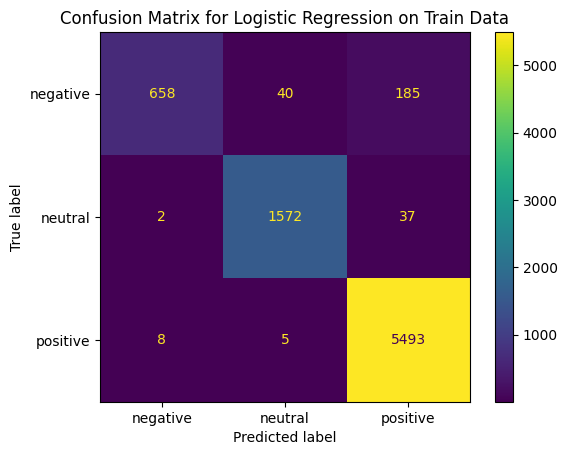

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the training set
y_pred_log_reg_train = log_reg.predict(X_train_tfidf)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_log_reg_train, labels=["negative", "neutral", "positive"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="viridis") 
disp.ax_.set_title('Confusion Matrix for Logistic Regression on Train Data')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Test Data')

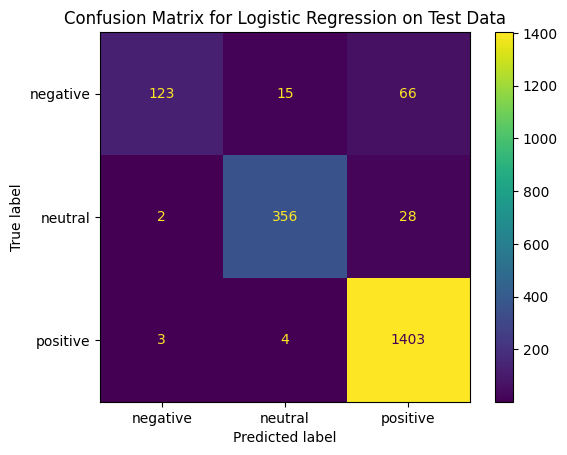

In [ ]:
# Create confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_log_reg, labels=["negative", "neutral", "positive"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="viridis") 
disp.ax_.set_title('Confusion Matrix for Logistic Regression on Test Data')



Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes on Train Data')

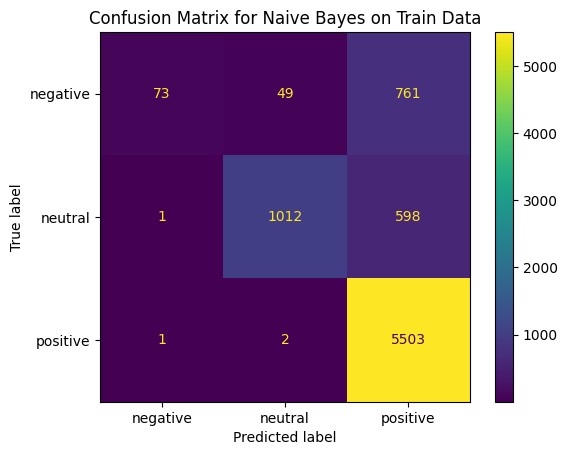

In [82]:
# Generate predictions for the training set
y_pred_nb_train = nb.predict(X_train_tfidf)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_nb_train, labels=["negative", "neutral", "positive"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="viridis") 
disp.ax_.set_title('Confusion Matrix for Naive Bayes on Train Data')

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes on Test Data')

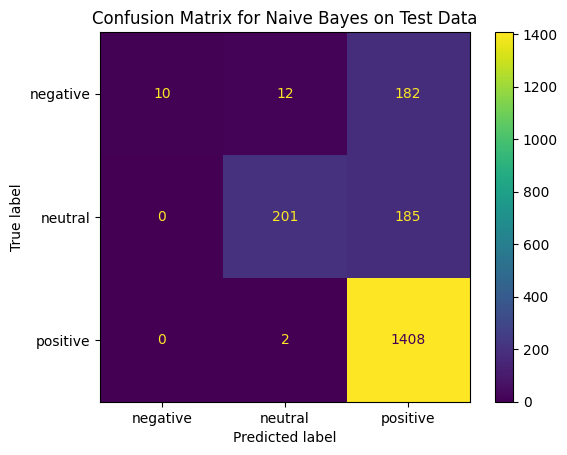

In [ ]:
# Create confusion matrix for the test set

cm = confusion_matrix(y_test, y_pred_nb, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap='viridis')
disp.ax_.set_title('Confusion Matrix for Naive Bayes on Test Data')

**We will now use PCA in order to reduce the data's dimensionality so we can use more advanced models.**

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.linear_model as skl

In [ ]:
# Create the y_numeric variable so PCA can be used

y_numeric = y_train.map({'negative': -1, 'neutral': 0, 'positive': 1})

NameError: name 'y_train' is not defined

In [3]:
y_numeric_test = y_test.map({'negative': -1, 'neutral': 0, 'positive': 1})

NameError: name 'y_test' is not defined

In [ ]:
# Create a pipeline with PCA and Linear Regression
X_train_tfidf = vectorizer.fit_transform(X_train)

pca = PCA(n_components=19) 
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca), ('linreg', linreg)]) 
pipe.fit(X_train_tfidf.toarray(), y_numeric)
pipe.named_steps['linreg'].coef_

array([-0.04562117, -0.13569305, -0.27148194,  0.28206453, -0.16133977,
        0.16937464,  0.05759253, -0.0078962 ,  0.15629918,  0.2173817 ,
       -0.17926415,  0.06542893,  0.62352941, -0.25513357,  0.00641714,
        0.09832265, -0.0341472 , -0.11806747,  0.32203932])

In [ ]:
# In order to improve our model, we can use cross-validation to find the best number of components for PCA. Create the folds below.
import sklearn.model_selection as skm
K = 5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [ ]:
# Use GridSearchCV to find the best number of components for PCA
param_grid = {'pca__n_components': range(1, 20)} 
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X_train_tfidf.toarray(), y_numeric)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(n_components=19)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

In [101]:
grid.best_params_

{'pca__n_components': 14}

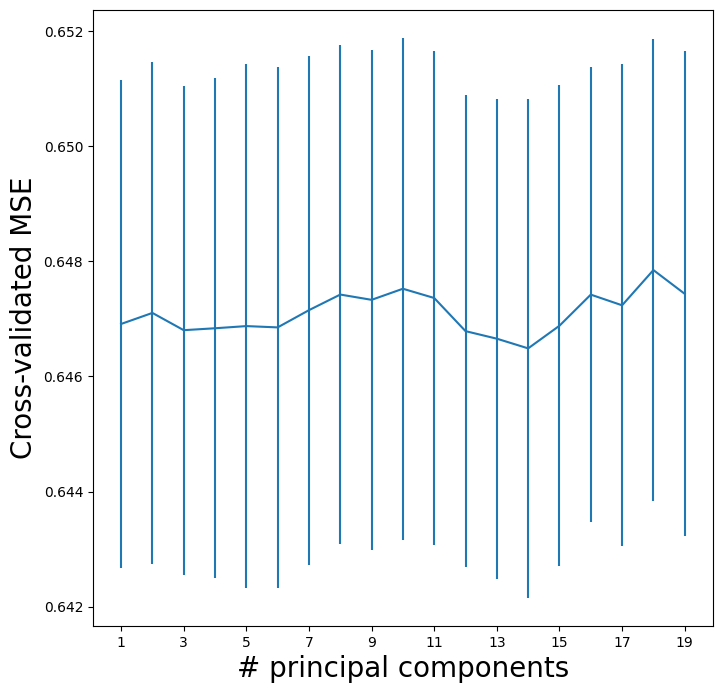

In [89]:
pcr_fig, ax = subplots(figsize=(8,8)) 
n_comp = param_grid['pca__n_components'] 
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K)) 
ax.set_ylabel('Cross-validated MSE', fontsize=20) 
ax.set_xlabel('# principal components', fontsize=20) 
ax.set_xticks(n_comp[::2])

In [90]:
# Update the pipeline with the best number of components

pca = PCA(n_components=14) 
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca), ('linreg', linreg)]) 
pipe.fit(X_train_tfidf.toarray(), y_numeric)
pipe.named_steps['linreg'].coef_

array([-0.04552443, -0.13592129, -0.27002474,  0.27894562, -0.15544583,
        0.18539905,  0.05753634,  0.00662674,  0.17209935,  0.25143588,
       -0.05084725, -0.06514671,  0.69339952,  0.12018423])

## Advanced models: LDA and QDA

**Below we use the pca model to run LDA and QDA.**

In [91]:
X_train_lda = vectorizer.fit_transform(X_train).toarray()
X_test_lda = vectorizer.transform(X_test).toarray()

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train_pca = pipe.named_steps['pca'].transform(X_train_lda)

lda = LDA()
lda.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis()

In [93]:
X_test_pca = pipe.named_steps['pca'].transform(X_test_lda)

y_pred_lda = lda.predict(X_test_pca)

print("Classification Report (LDA):")
print(classification_report(y_test, y_pred_lda))

print("Confusion Matrix (LDA):")
print(confusion_matrix(y_test, y_pred_lda))

Classification Report (LDA):
              precision    recall  f1-score   support

    negative       0.38      0.04      0.08       204
     neutral       0.70      0.56      0.62       386
    positive       0.81      0.96      0.88      1410

    accuracy                           0.79      2000
   macro avg       0.63      0.52      0.53      2000
weighted avg       0.74      0.79      0.75      2000

Confusion Matrix (LDA):
[[   9   46  149]
 [   6  215  165]
 [   9   48 1353]]


# Confusion Matrix -- LDA QDA

Text(0.5, 1.0, 'Confusion Matrix for LDA on Test Data')

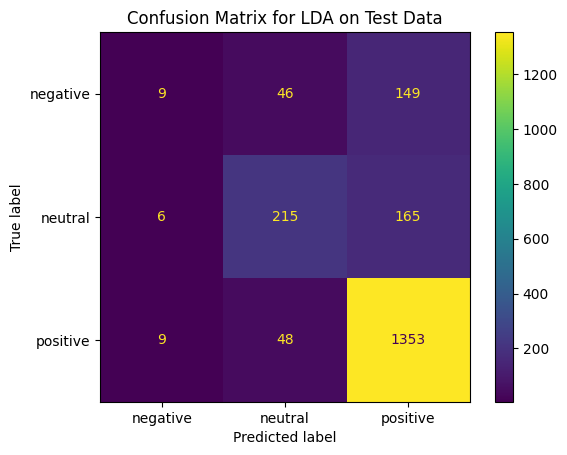

In [94]:
cm = confusion_matrix(y_test, y_pred_lda, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap='viridis')
disp.ax_.set_title('Confusion Matrix for LDA on Test Data')

In [95]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA(store_covariance=True)
qda.fit(X_train_pca, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [96]:
y_pred_qda = qda.predict(X_test_pca)

print("Classification Report (QDA):")
print(classification_report(y_test, y_pred_qda))

print("Confusion Matrix (QDA):")
print(confusion_matrix(y_test, y_pred_qda))

Classification Report (QDA):
              precision    recall  f1-score   support

    negative       0.24      0.35      0.29       204
     neutral       0.50      0.77      0.61       386
    positive       0.92      0.72      0.81      1410

    accuracy                           0.70      2000
   macro avg       0.56      0.62      0.57      2000
weighted avg       0.77      0.70      0.72      2000

Confusion Matrix (QDA):
[[  72   82   50]
 [  49  299   38]
 [ 174  215 1021]]


Text(0.5, 1.0, 'Confusion Matrix for QDA on Test Data')

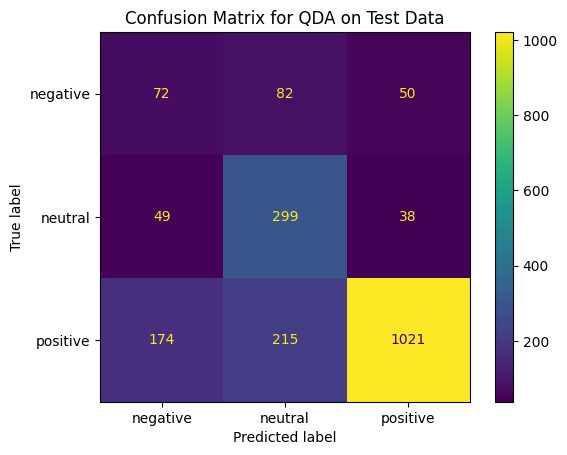

In [97]:
cm = confusion_matrix(y_test, y_pred_qda, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap='viridis')
disp.ax_.set_title('Confusion Matrix for QDA on Test Data')

# Regularization for Logistic Regression 

**Out of all the models we have run thus far, Logistic Regression has the best accuracy. We will test regularization strength to see if we can improve the logistic regression model. The goal is to find the optimal regularization parameter that maximizes accuracy on the test set.**



In [98]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt

Regularization Strength: 1e-05, Test Set Accuracy: 0.7050
Regularization Strength: 0.0001, Test Set Accuracy: 0.7050
Regularization Strength: 0.001, Test Set Accuracy: 0.7050
Regularization Strength: 0.01, Test Set Accuracy: 0.7050
Regularization Strength: 0.1, Test Set Accuracy: 0.7510
Regularization Strength: 1, Test Set Accuracy: 0.9115
Regularization Strength: 10, Test Set Accuracy: 0.9690
Regularization Strength: 100, Test Set Accuracy: 0.9670
Regularization Strength: 1000, Test Set Accuracy: 0.9655
Regularization Strength: 10000, Test Set Accuracy: 0.9655


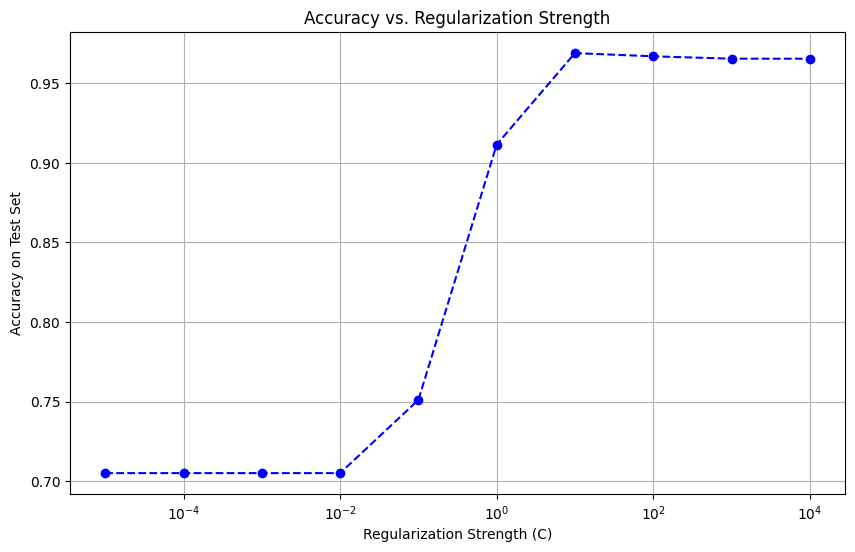

In [99]:
# Logistic Regression has the best accuracy. We will test regularization strength to see if we can improve the model

reg_strengths = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

accuracies = []

for reg_strength in reg_strengths:
    classifier = LogisticRegression(C=reg_strength, penalty='l2', solver='liblinear', random_state=42)
    classifier.fit(X_train_tfidf, y_train)

    # YOUR CODE BELOW TO EVALUATE ON DEV SET
    y_pred_log_reg = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred_log_reg)

    accuracies.append(accuracy)

    print(f"Regularization Strength: {reg_strength}, Test Set Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(reg_strengths, accuracies, marker='o', linestyle='--', color='b')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy on Test Set')
plt.title('Accuracy vs. Regularization Strength')
plt.grid(True)
plt.show()

**Now, we will extract the 5 least and most predicitve features that help the logistic regression model classify the Yelp reviews. Note: our features are specific words from the text as opposed to variables from the original dataset.**

In [100]:
feature_names = vectorizer.get_feature_names_out()

for class_idx, class_label in enumerate(log_reg.classes_):
    print(f"\nClass: {class_label}")
    coefficients = log_reg.coef_[class_idx]
    sorted_indices = np.argsort(np.abs(coefficients))

    least_predictive_features = [(feature_names[i], coefficients[i]) for i in sorted_indices[:5]]
    most_predictive_features = [(feature_names[i], coefficients[i]) for i in sorted_indices[-5:]]

    print("5 Least Predictive Features:")
    for feature, coef in least_predictive_features:
        print(f"{feature}: {coef:.4f}")

    print("\n5 Most Predictive Features:")
    for feature, coef in most_predictive_features:
        print(f"{feature}: {coef:.4f}")




Class: negative
5 Least Predictive Features:
crepe: -0.0000
casserole: -0.0001
baklava: -0.0002
squeeze: -0.0003
promised: -0.0003

5 Most Predictive Features:
good: 2.0237
nothing: 2.0351
ok: 2.1233
wasnt: 2.2110
however: 2.2196

Class: neutral
5 Least Predictive Features:
sufficed: 0.0000
transportation: -0.0000
150: 0.0001
flying: -0.0002
settled: -0.0002

5 Most Predictive Features:
amazing: -2.9212
good: -3.0351
delicious: -3.2339
worst: 3.2780
great: -3.7334

Class: positive
5 Least Predictive Features:
valuable: 0.0000
crossed: 0.0000
bent: 0.0004
307: -0.0004
stiffing: -0.0004

5 Most Predictive Features:
ok: -2.8523
definitely: 2.9497
delicious: 3.4763
amazing: 3.8912
great: 4.4072
